In [1]:
import numpy as np
from commons import *
from gd import *
from mirror_descent import *
from acceleration import *
from exploration import *
from prox_svrg import *

In [2]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")

## Gradient Descent

In [3]:
x, accs = gd()

In [6]:
x1, accs1 = gd(z=100, projected=True)

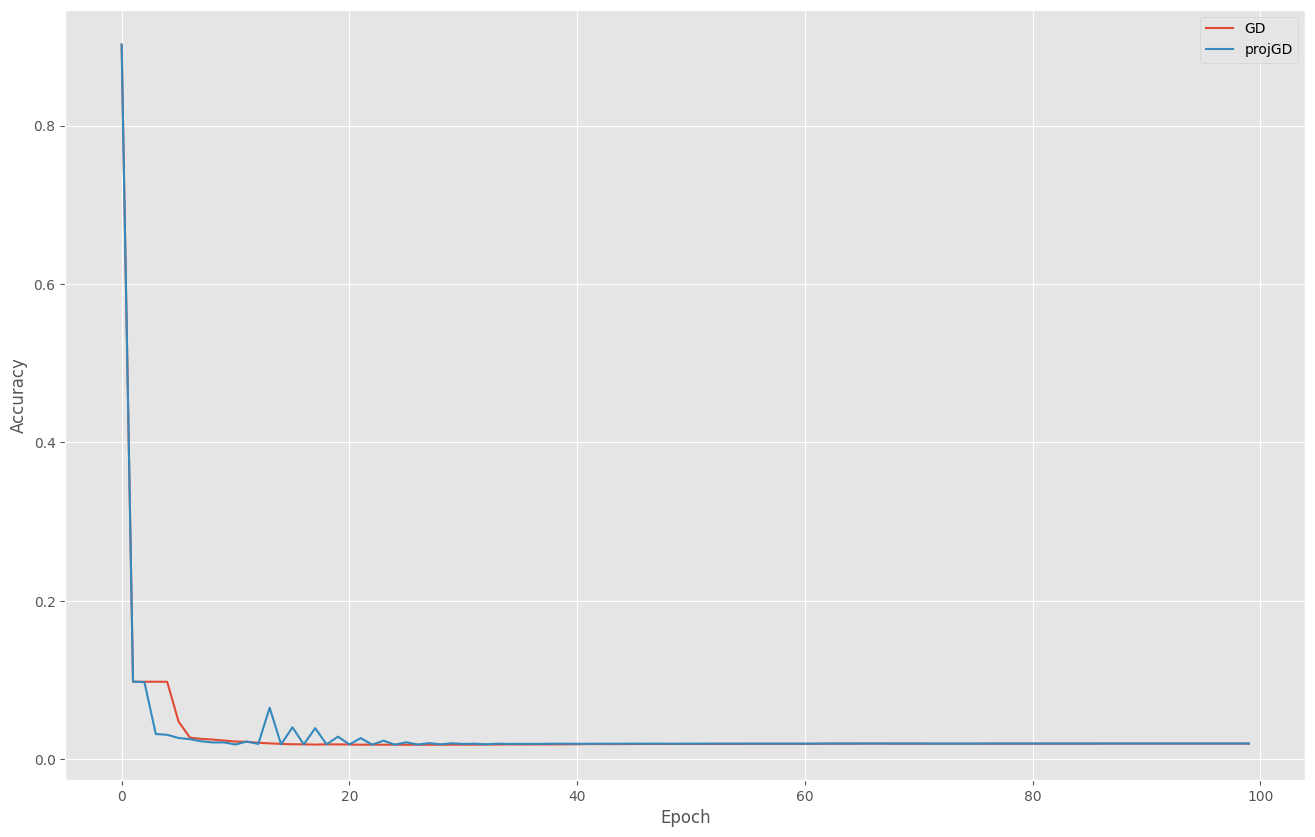

In [7]:
plt.figure(figsize=(16, 10))
plt.plot(range(len(accs)), accs, label="GD")
plt.plot(range(len(accs1)), accs1, label="projGD")

plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

## Stochastic Gradient Descent

In [8]:
x2, accs2 = sgd()
x3, accs3 = sgd(sqrt_lr=True)
x4, accs4 = sgd(projected=True, z=2)
x5, accs5 = sgd(sqrt_lr=True, projected=True, z=2)

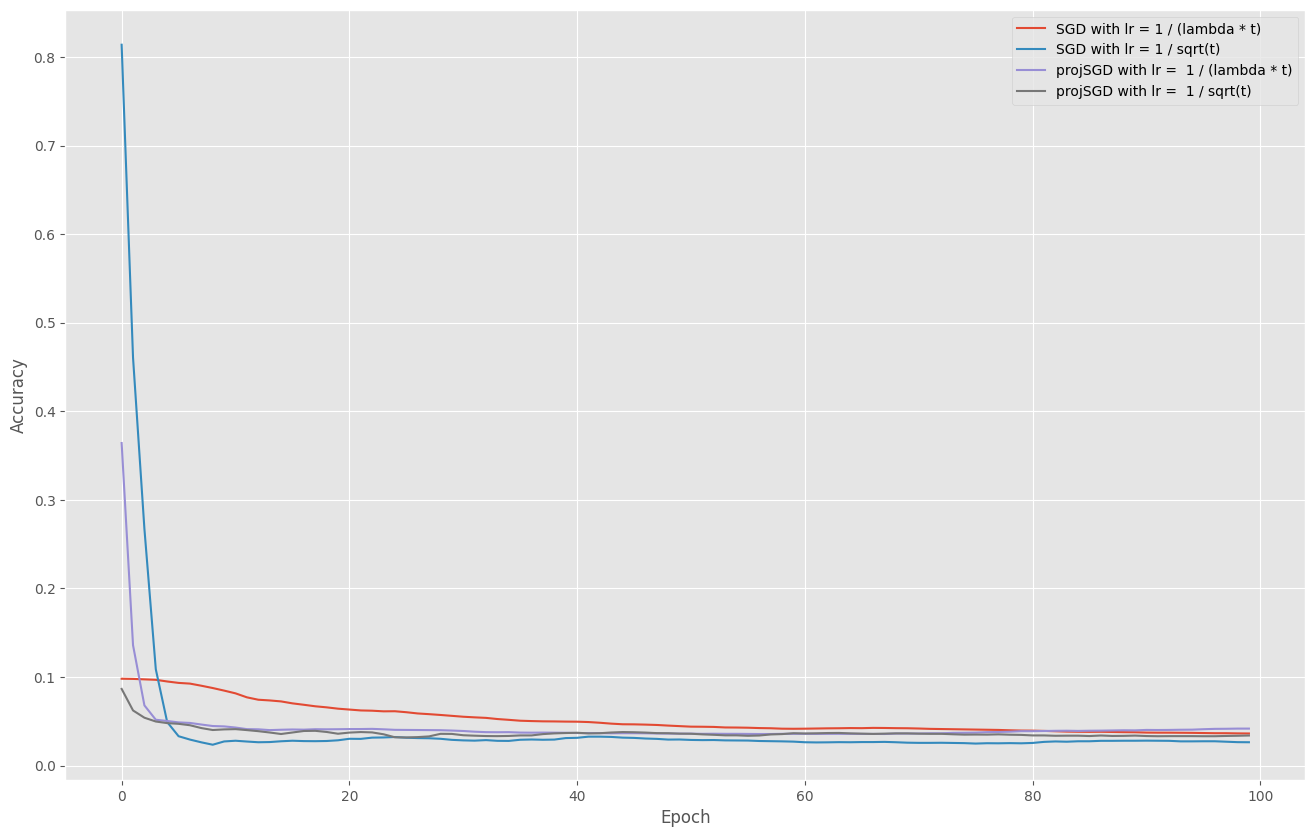

In [15]:
plt.figure(figsize=(16, 10))
plt.plot(range(len(accs)), accs2, label="SGD with lr = 1 / (lambda * t)")
plt.plot(range(len(accs1)), accs3, label="SGD with lr = 1 / sqrt(t)")
plt.plot(range(len(accs4)), accs4, label="projSGD with lr =  1 / (lambda * t)")
plt.plot(range(len(accs5)), accs5, label="projSGD with lr =  1 / sqrt(t)")

plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

## Stochastic Mirror Descent

In [14]:
x6, accs6 = smd(z=100)

## Stochastic Exponentiated Gradient +/-

In [15]:
x7, accs7 = seg(z=100)

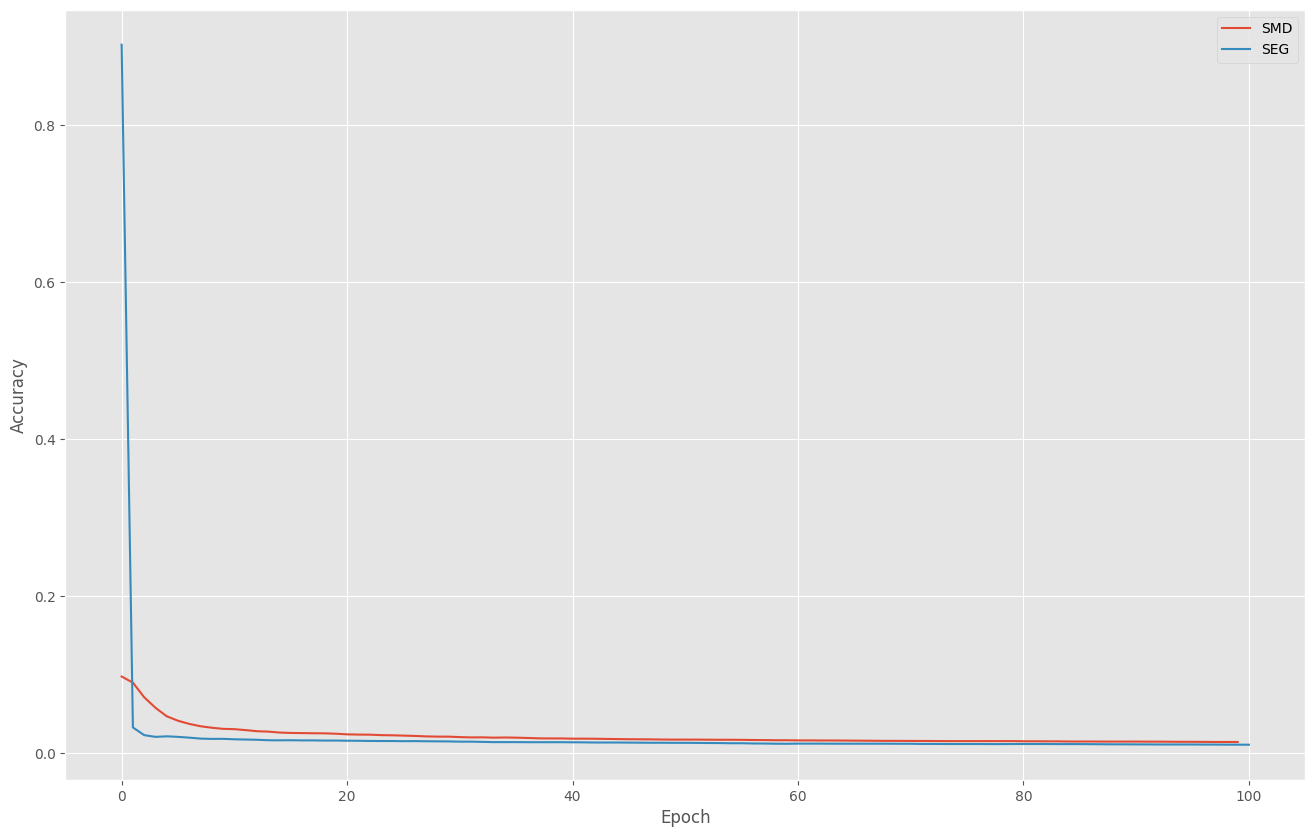

In [16]:
plt.figure(figsize=(16, 10))
plt.plot(range(len(accs6)), accs6, label="SMD")
plt.plot(range(len(accs7)), accs7, label="SEG")

plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

## AdaGrad

In [8]:
x8, accs8 = ada_grad(z=100)

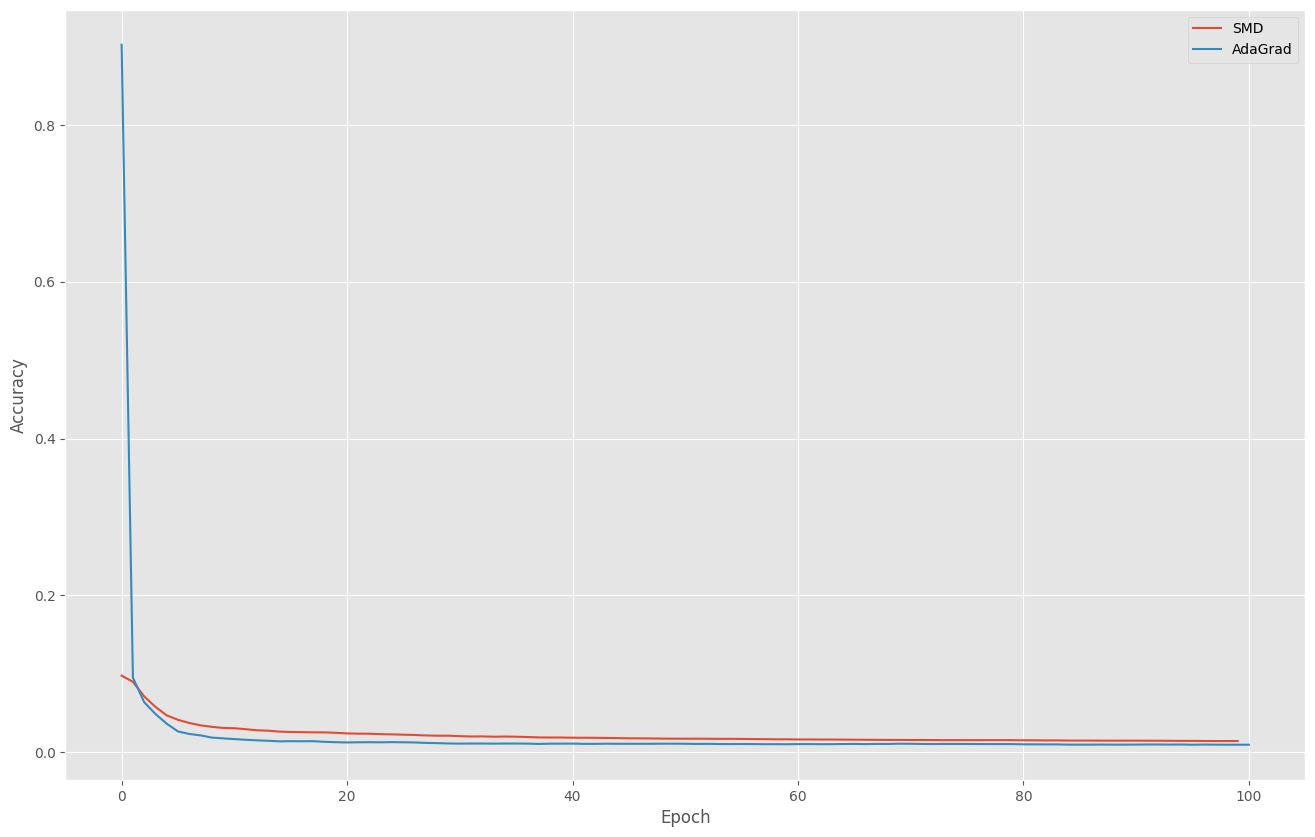

In [17]:
plt.figure(figsize=(16, 10))
plt.plot(range(len(accs6)), accs6, label="SMD")
plt.plot(range(len(accs8)), accs8, label="AdaGrad")

plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

## ONS

In [4]:
x9, accs9 = ons(n_epochs=100)

KeyboardInterrupt: 

## SREG +/-

In [9]:
x10, accs10 = sreg()

## SBEG +/-

In [12]:
x11, accs11 = sbeg()

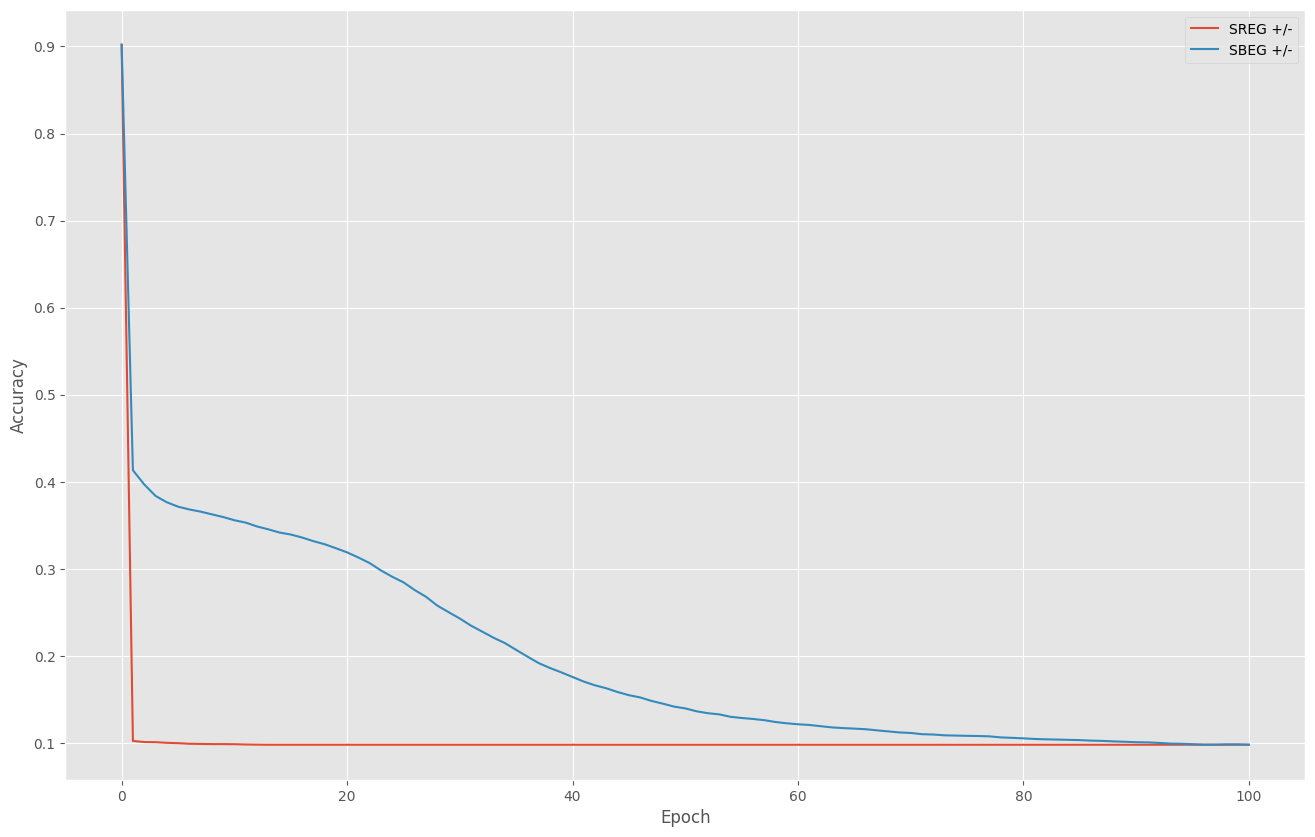

In [13]:
plt.figure(figsize=(16, 10))
plt.plot(range(len(accs10)), accs10, label="SREG +/-")
plt.plot(range(len(accs11)), accs11, label="SBEG +/-")

plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

## Prox-SVRG

In [19]:
x12, accs12 = prox_svrg(lr=0.01)

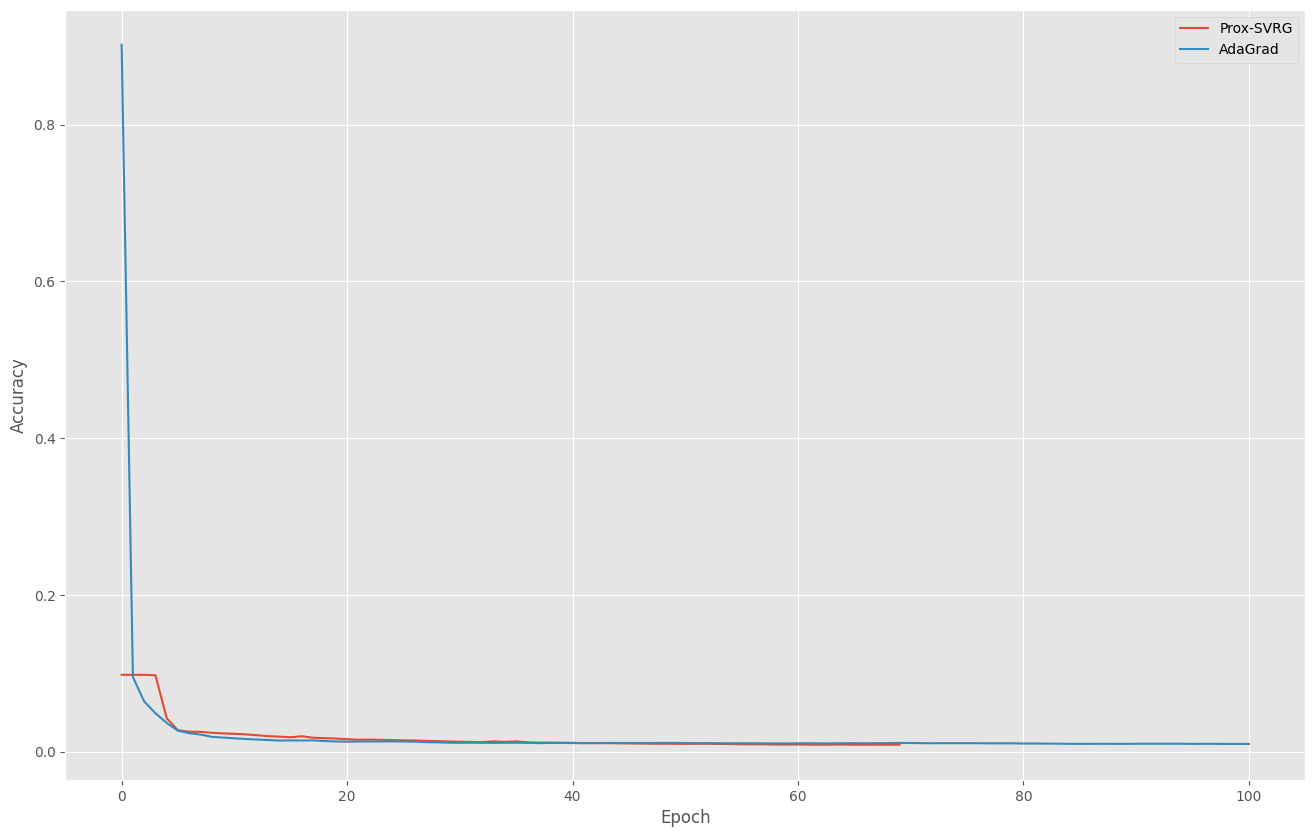

In [20]:
plt.figure(figsize=(16, 10))
plt.plot(range(len(accs12)), accs12, label="Prox-SVRG")
plt.plot(range(len(accs8)), accs8, label="AdaGrad")

plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

## Test projection

In [7]:
x = np.array([[100], [101], [103], [103], [104]])

In [8]:
x_ = projection_simplex(x)

In [9]:
x_

array([[0.],
       [0.],
       [0.],
       [0.],
       [1.]])

In [10]:
y = projection_l1_ball(x, 50)

In [11]:
y

array([[ 7.8],
       [ 8.8],
       [10.8],
       [10.8],
       [11.8]])

In [6]:
D = np.eye(2) * 4

In [7]:
x = np.array([[0.9], [0.8]])

In [8]:
x_ = projection_simplex_weighted_norm(x, D)

()


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [10]:
x_

array([[0.55],
       [0.45]])

In [4]:
x_1 = projection_simplex(x)

break at d=1
1 9.0


In [5]:
x_1

array([[0.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [6]:
x = np.array([[1], [2], [5], [4]])

In [18]:
ind = x.argsort(axis=0)

In [19]:
ind

array([[0],
       [1],
       [3],
       [2]])

In [7]:
y = np.squeeze(x)

In [8]:
y

array([1, 2, 5, 4])

In [8]:
y = np.array([[0.9], [0.8]])

In [12]:
D = np.array([[1], [5]])

In [13]:
D

array([[1],
       [5]])

In [14]:
y_ = projection_simplex_weighted_norm(y, D)

-0.9999999999999998
[[0.9]]


In [15]:
y_

array([[[0.06333333],
        [0.68333333]],

       [[0.31666667],
        [3.41666667]]])

In [10]:
def objective_func(x, y, D):
    return 0.5 * np.dot(np.dot((x - y).T, D), (x - y))[0, 0]

In [3]:
cons = (
    {
        "type": "eq", "fun": lambda x, z: np.sum(np.abs(x)) 
    }
)

bounds = ((0.0, 1.0), (0.0, 1.0))

In [44]:
result = minimize(
    objective_func,
    np.ones(shape=(2, 1)) / 2,
    (y),
    constraints=cons,
    bounds=bounds,
    method="SLSQP"
)

In [45]:
result

     fun: 0.3535533905932738
     jac: array([-0.49497474, -0.49497474])
 message: 'Optimization terminated successfully'
    nfev: 3
     nit: 1
    njev: 1
  status: 0
 success: True
       x: array([0.5, 0.5])

In [3]:
y = np.load("y.npy")

In [4]:
d = np.load("d.npy")

In [5]:
x = np.abs(y) / 100

In [6]:
x_ = projection_simplex_weighted_norm(x, d)

In [7]:
np.sum(x_)

0.9999999999999997

In [29]:
def obj_func(x, y, A):
    return 0.5 * np.dot(np.dot((x - y).T, A), (x - y))[0, 0] 

In [45]:
cons = (
    {
        "type": "ineq", "fun": lambda x: 1 - np.sum(np.abs(x)) 
    }
)

In [46]:
A = np.random.randn(2, 2)

In [47]:
y = np.array([[0.8], [0.9]])

In [48]:
y

array([[0.8],
       [0.9]])

In [49]:
result = minimize(
    obj_func,
    np.ones(shape=(2, 1)) / 2,
    (y, A),
    constraints=cons
)

In [50]:
result

     fun: -2.9806494573887545
     jac: array([3.24238363, 0.        ])
 message: 'Optimization terminated successfully'
    nfev: 45
     nit: 12
    njev: 12
  status: 0
 success: True
       x: array([-1.00000011e+00,  1.10287816e-07])

In [43]:
result.x

array([-1.00000001e+01,  1.25406617e-07])

In [44]:
np.sum(np.abs(result.x))

10.00000025079883

In [51]:
type(result.x)

numpy.ndarray

In [53]:
result.x[:, None].shape

(2, 1)

In [6]:
a = np.random.choice(2 * 2)

In [7]:
a

2

In [8]:
ind = a * (a < 2) + (a - 2) * (a >= 2)

In [9]:
ind

0

In [6]:
from math import sqrt

In [7]:
sqrt(5000)

70.71067811865476

In [8]:
a = np.array([1, 2])

In [9]:
b = a

In [10]:
a = a + 1

In [11]:
a

array([2, 3])

In [12]:
b

array([1, 2])